In [95]:
import cv2
from IPython.display import display, Image
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# file_names = [
#     "img/17_知覚データを取得する3.jpg",
#     "img/46_知覚データを取得する3.jpg",
#     "img/25_知覚データを取得する3.jpg",
#     "img/23_知覚データを取得する2.jpg",
#     "img/23_知覚データを取得する3.jpg",
#     "img/62_知覚データを取得する3.jpg",
#     "img/5_ダブルループを攻略する2.jpg",
#     "img/18_知覚データを取得する2.jpg",
# ]

# 異常系
file_names = [
    "img/48_知覚データを取得する3.jpg",
    "img/52_知覚データを取得する3.jpg",
    "img/57_知覚データを取得する3.jpg",
    "img/32_知覚データを取得する3.jpg",
    "img/31_知覚データを取得する3.jpg",
    "img/23_知覚データを取得する3.jpg"

]

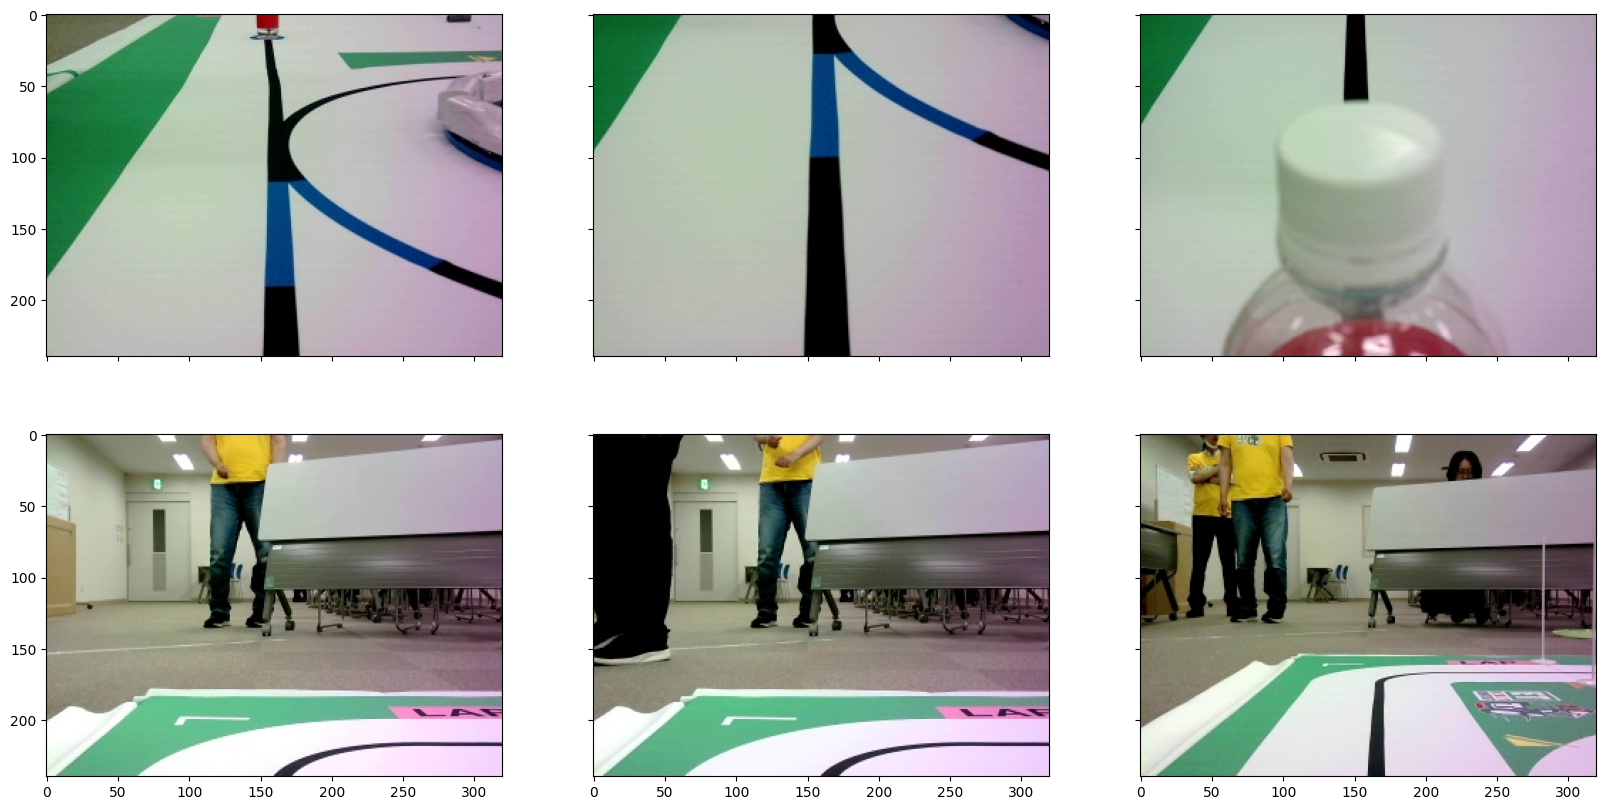

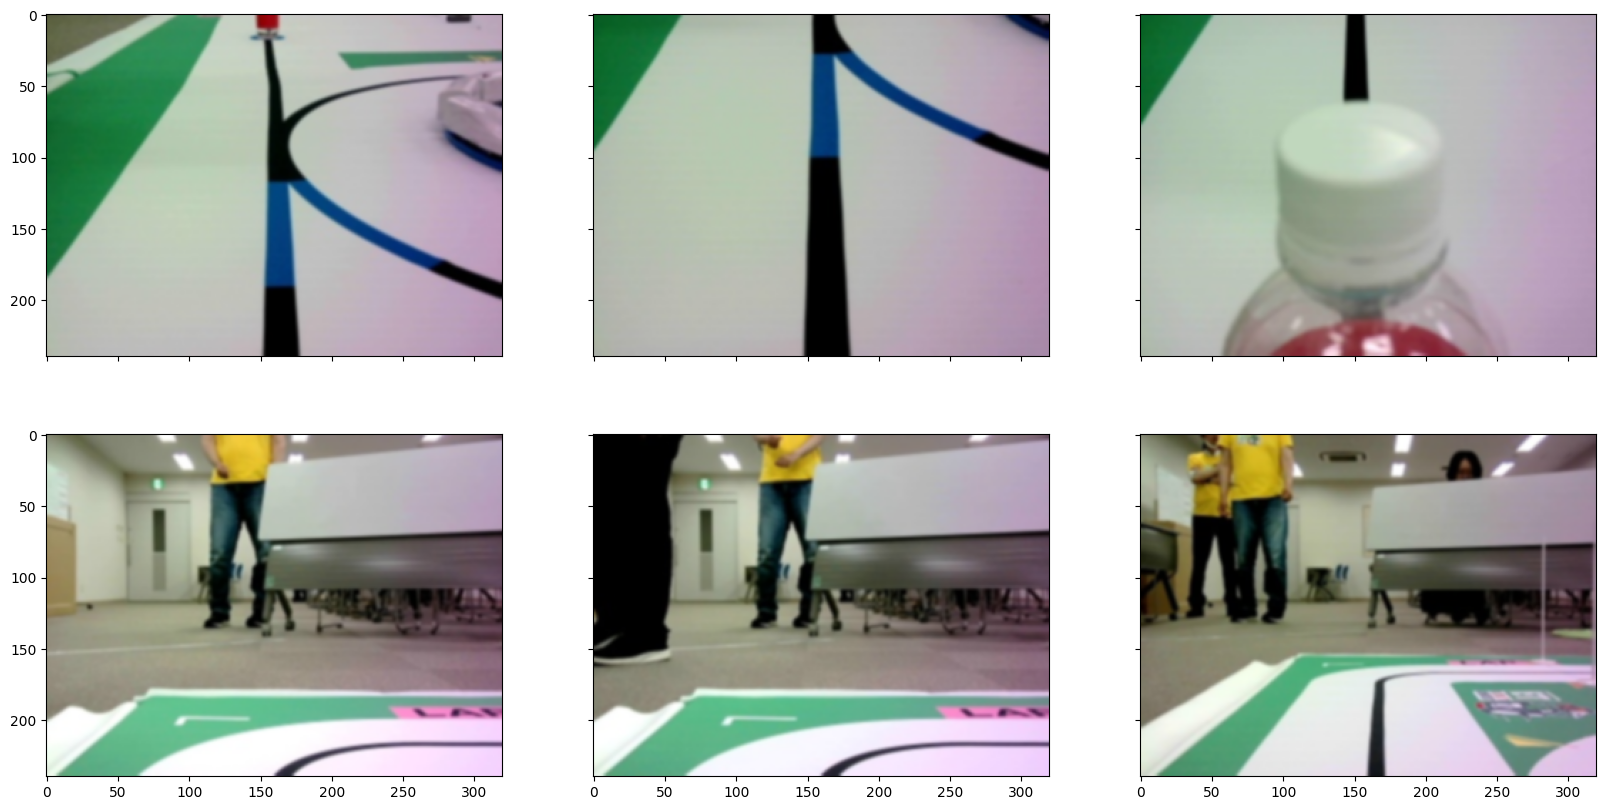

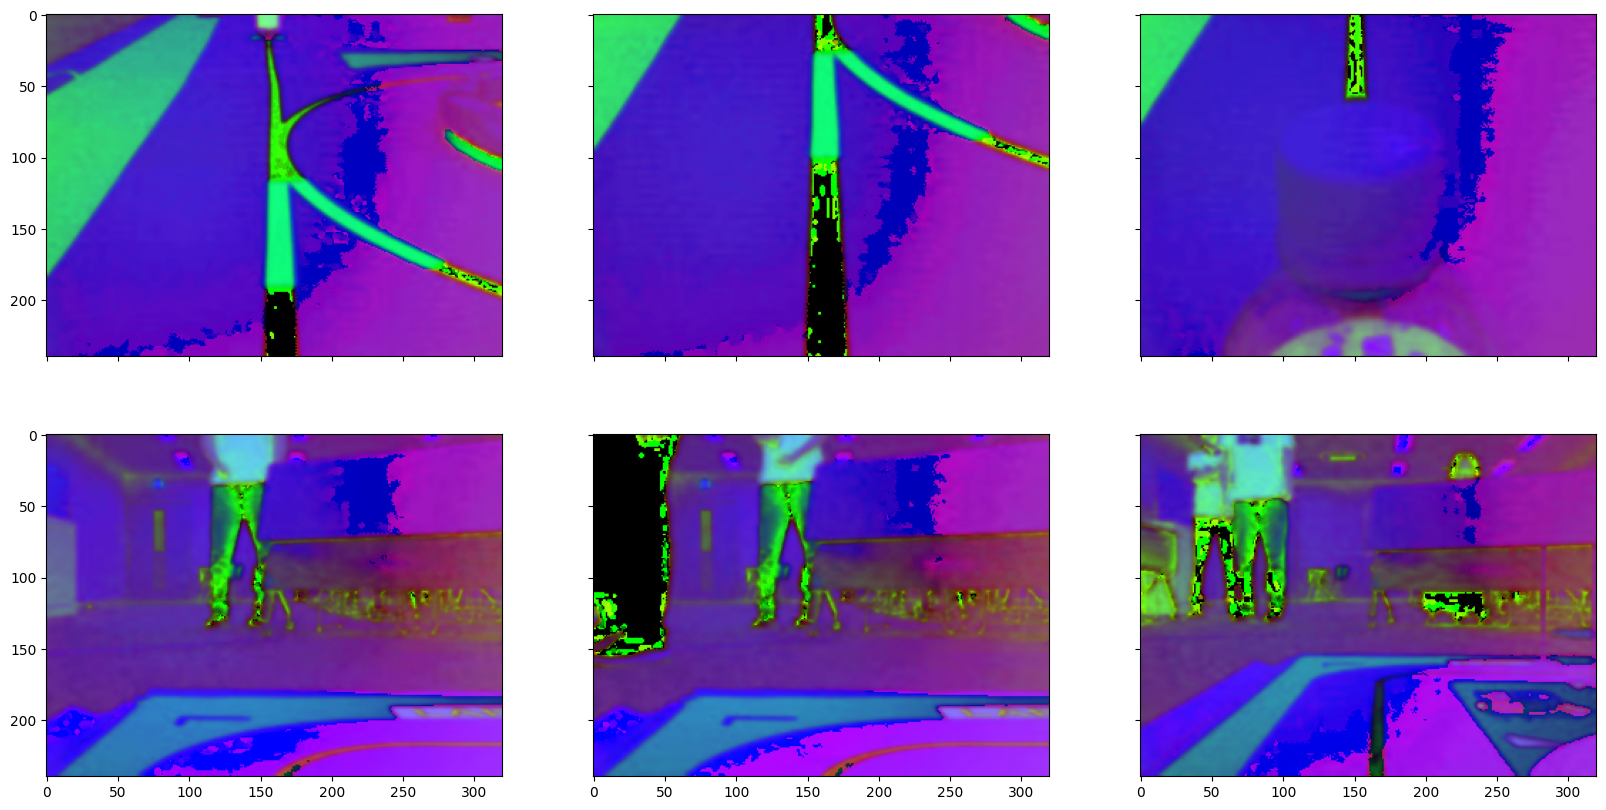

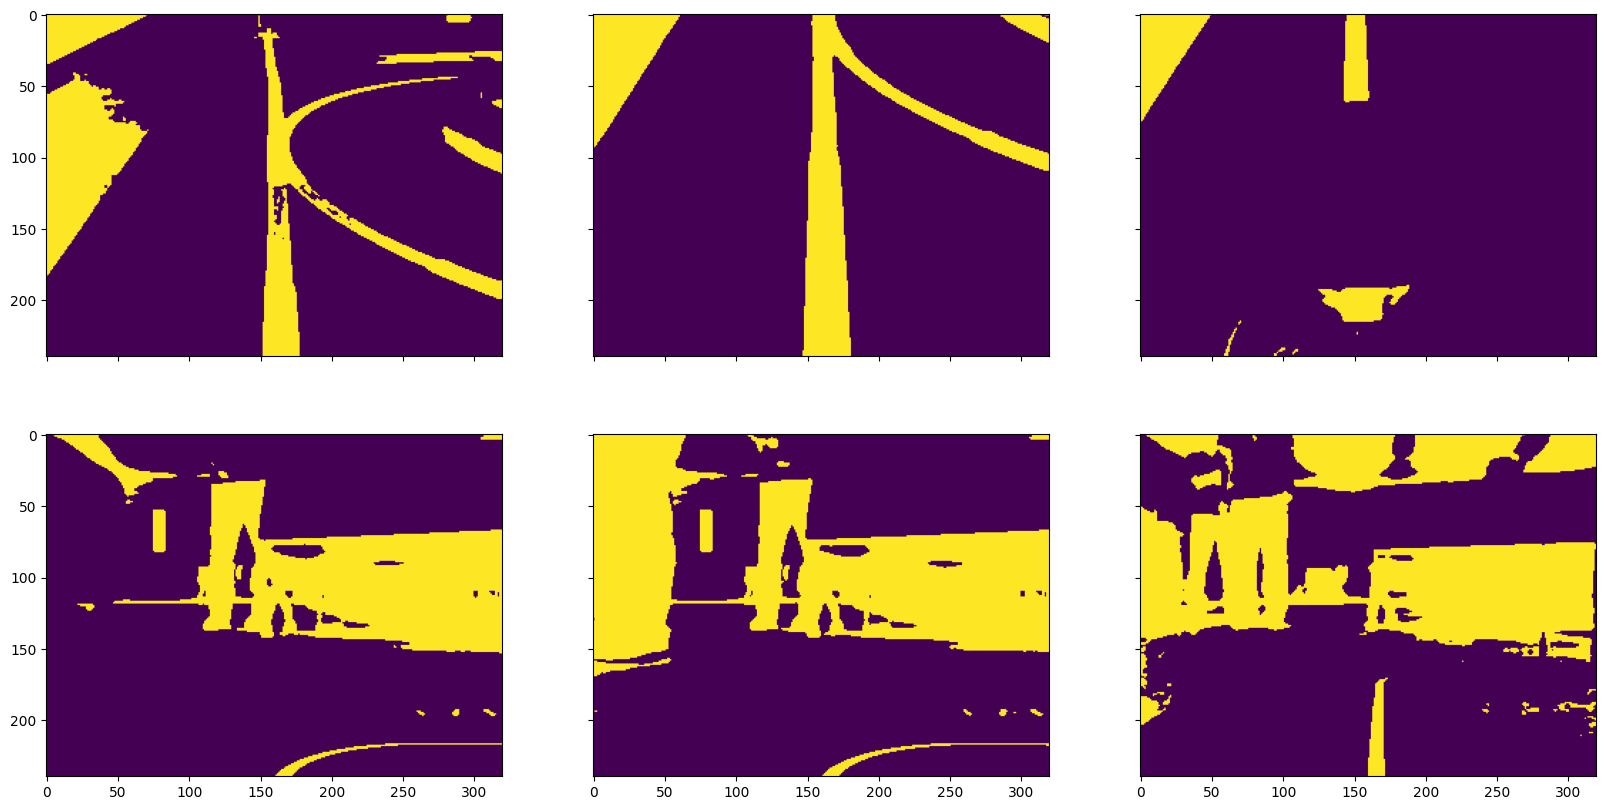

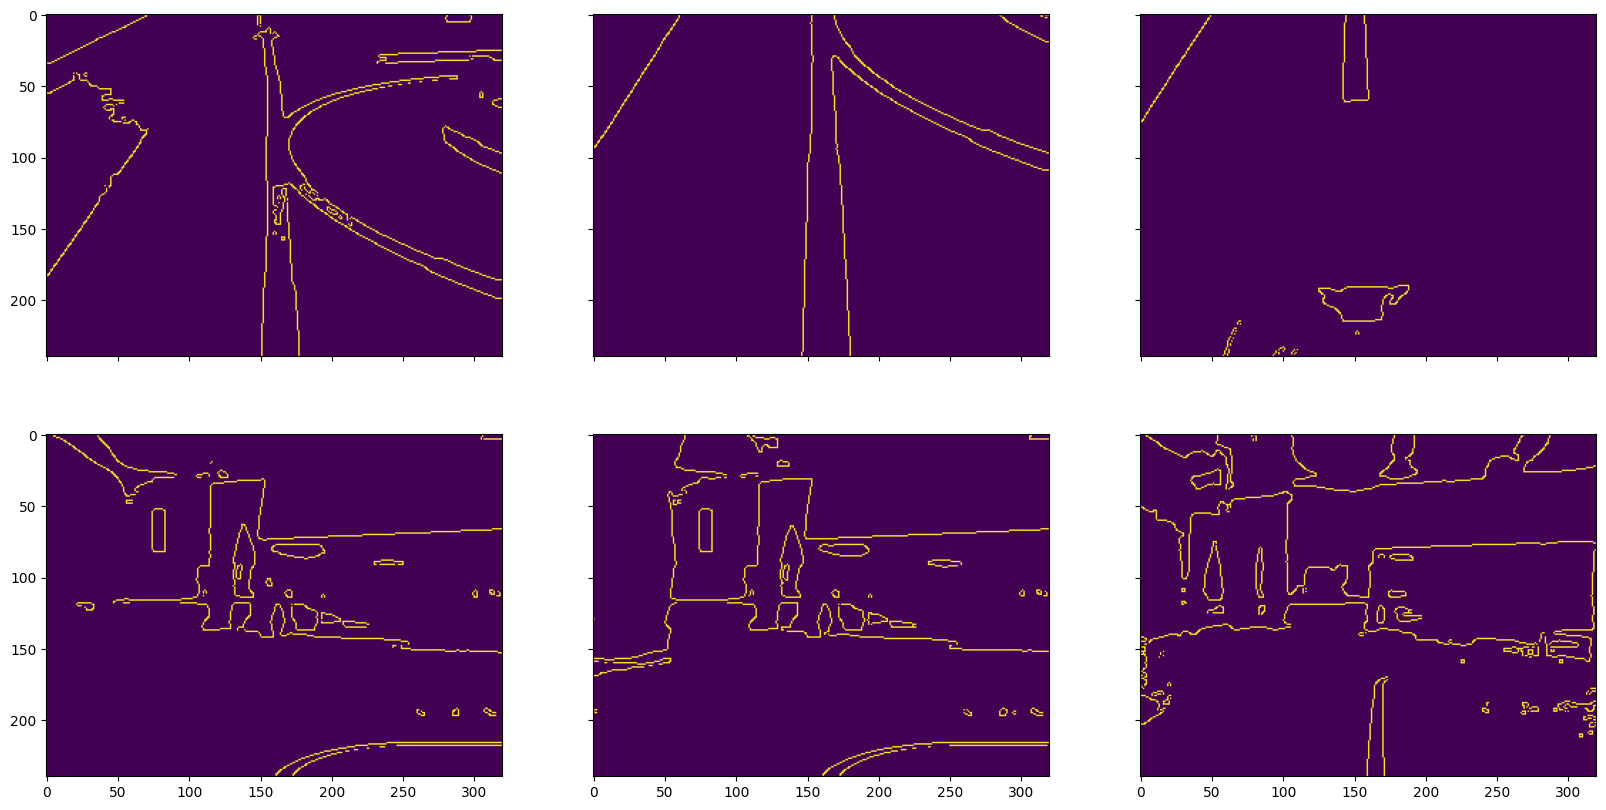

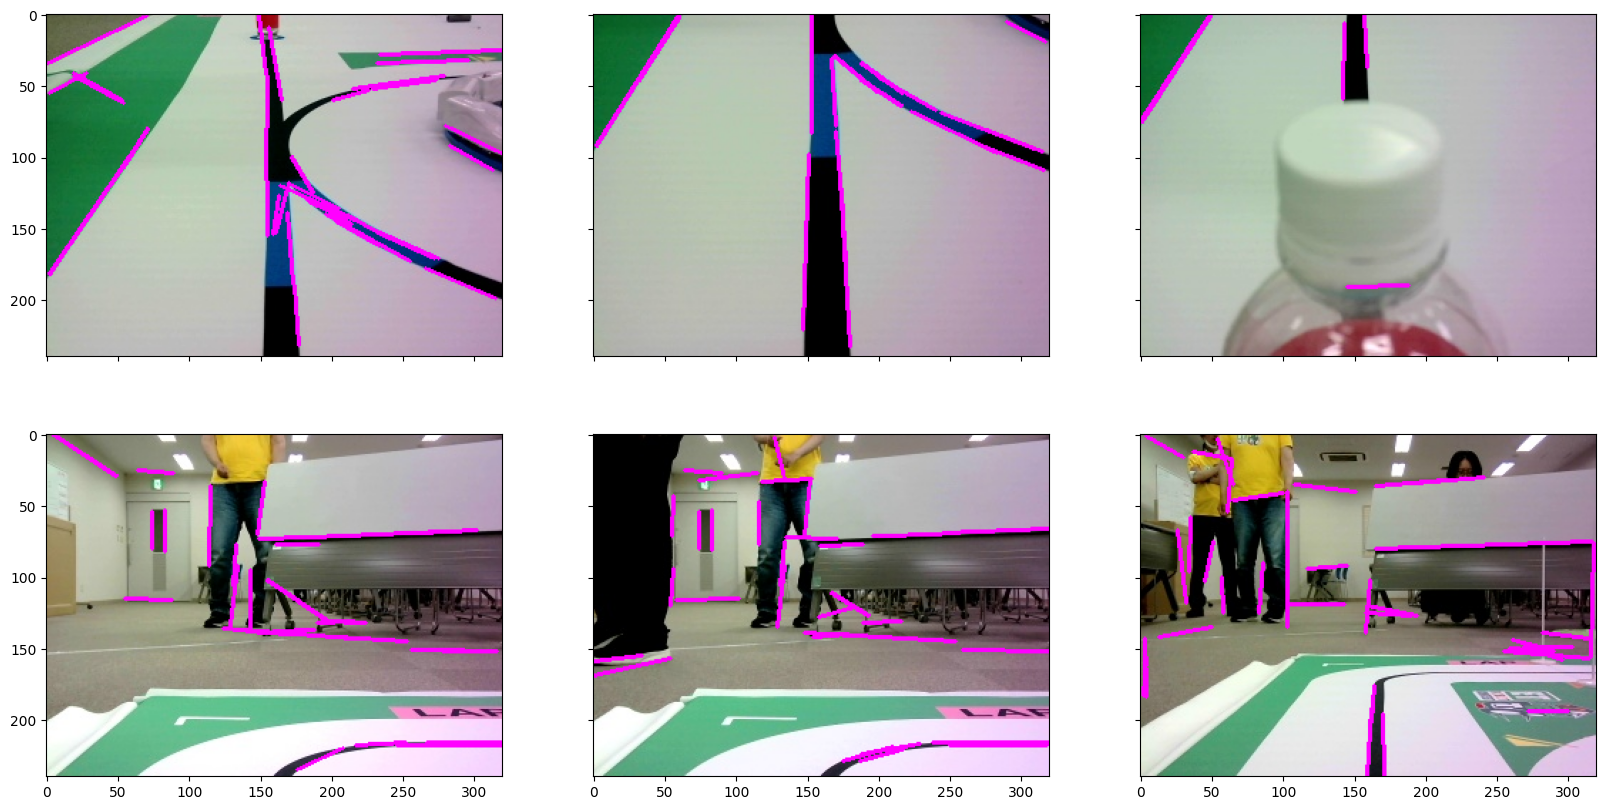

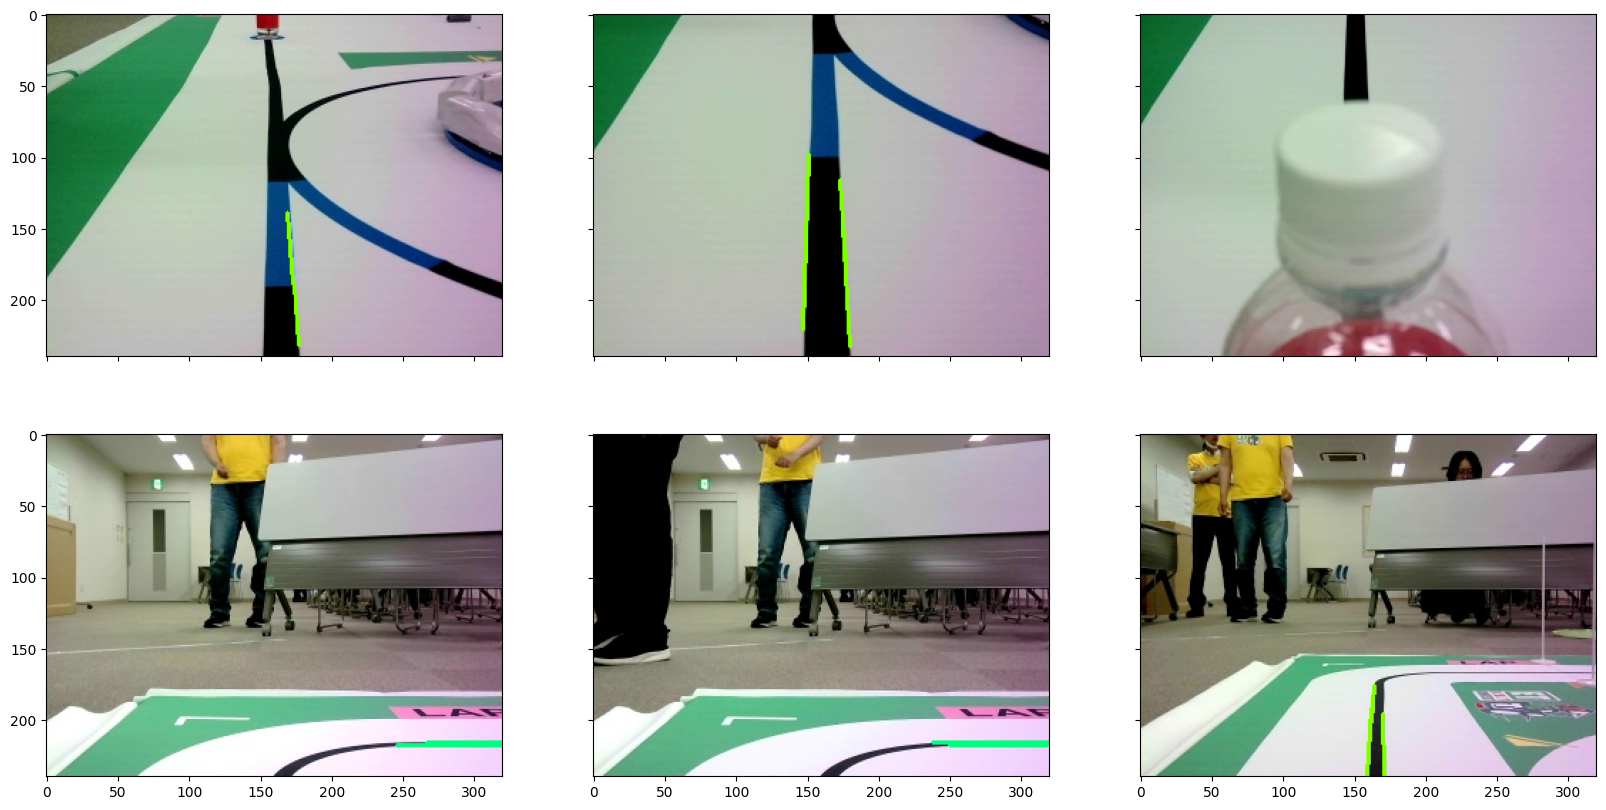

In [107]:
row = 2
col = 3

fix1, ax1 = plt.subplots(row, col, sharex=True, sharey=True, figsize=(20, 10))
fix2, ax2 = plt.subplots(row, col, sharex=True, sharey=True, figsize=(20, 10))
fix3, ax3 = plt.subplots(row, col, sharex=True, sharey=True, figsize=(20, 10))
fix4, ax4 = plt.subplots(row, col, sharex=True, sharey=True, figsize=(20, 10))
fix5, ax5 = plt.subplots(row, col, sharex=True, sharey=True, figsize=(20, 10))
fix6, ax6 = plt.subplots(row, col, sharex=True, sharey=True, figsize=(20, 10))
fix7, ax7 = plt.subplots(row, col, sharex=True, sharey=True, figsize=(20, 10))

for i in range(row):
    for j in range(col):
        img1 = cv2.imread(file_names[i * col + j])
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        ax1[i, j].imshow(img1)

        img2 = cv2.GaussianBlur(img1, (5, 5), 0)
        ax2[i, j].imshow(img2)

        img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
        ax3[i, j].imshow(img3)

        img4 = cv2.inRange(img3, (0, 0, 0), (360, 255, 127))
        ax4[i, j].imshow(img4)

        img5 = cv2.Canny(img4, 50, 150) # エッジ検出
        ax5[i, j].imshow(img5)

        lines = cv2.HoughLinesP(img5, 1, np.pi / 180, 20, minLineLength=25, maxLineGap=10) # 直線検出
        img6 = img1.copy()
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(img6, (x1, y1), (x2, y2), (255, 0, 255), 2)
        ax6[i, j].imshow(img6)

        img7 = img1.copy()
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                ## 正面から伸びている直線だけを抽出
                if (
                    ((img1.shape[1] * 2 / 5) < x1) and (x1 < (img1.shape[1] * 3 / 5)) and ((img1.shape[0] * 5 / 7) < y1)
                    or ((img1.shape[1] * 2 / 5) < x2) and (x2 < (img1.shape[1] * 3 / 5)) and ((img1.shape[0] * 5 / 7) < y2)
                ):
                    ## 正面に向かって伸びている直線だけを抽出
                    if np.abs(np.tan(np.arctan2(x2 - x1, y2 - y1))) < 0.1:
                        cv2.line(img7, (x1, y1), (x2, y2), (127, 255, 0), 2)
                    
                ## 近場の直線を抽出
                if (
                    (img1.shape[0] * 3 / 4 < y1)
                    and (img1.shape[0] * 3 / 4 < y2)
                    and (
                        (x1 < 5) # 横端にほとんど見切れている
                        or (x2 < 5) # 横端にほとんど見切れている
                        or (img1.shape[1] - 5 < x1) # 横端にほとんど見切れている
                        or (img1.shape[1] - 5 < x2) # 横端にほとんど見切れている
                    )
                ):
                    ## 真横に伸びている直線だけを抽出
                    if np.abs(np.tan(np.arctan2(y2 - y1, x2 - x1))) < 0.1:
                        cv2.line(img7, (x1, y1), (x2, y2), (0, 255, 127), 2)

        ax7[i, j].imshow(img7)
plt.show()